In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.metrics import silhouette_score

In [2]:
us = pd.read_csv('USArrests.csv',index_col=0)

In [3]:
us.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
scaler = StandardScaler().set_output(transform='pandas')
us_scaled = scaler.fit_transform(us)

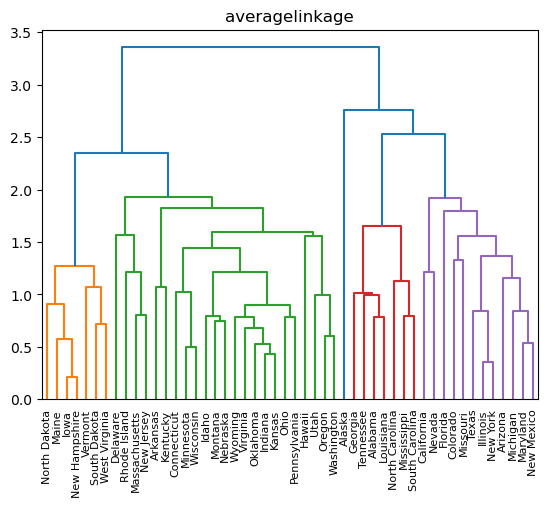

In [5]:
link="average"
mergings = linkage(us_scaled,method=link)
dendrogram(mergings,labels=list(us_scaled.index))
plt.title(link+'linkage')
plt.xticks(rotation=90)
plt.show()

In [6]:
scores = []
n_clust = [2,3,4,5]
for i in n_clust:
    clust = AgglomerativeClustering(n_clusters=i,linkage='average')
    clust.fit(us_scaled)
    scores.append(silhouette_score(us_scaled,clust.labels_))
print(scores)
i_max = np.argmax(scores)
print("Best no. of Clusters: ",n_clust[i_max])

[0.4084890326217641, 0.34863679190476177, 0.3636819420151221, 0.3212682619092323]
Best no. of Clusters:  2


In [7]:
clust = AgglomerativeClustering(n_clusters=2,linkage='average')
clust.fit(us_scaled)
silhouette_score(us_scaled,clust.labels_)

0.4084890326217641

In [8]:
df_clust = pd.DataFrame({'city':list(us_scaled.index),'cluster':list(clust.labels_)})

In [9]:
df_clust.sort_values('cluster')

,city,cluster
0,Alabama,0
42,Texas,0
41,Tennessee,0
39,South Carolina,0
32,North Carolina,0
31,New York,0
30,New Mexico,0
27,Nevada,0
23,Mississippi,0
21,Michigan,0
